In [1]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"yashgupta2807","key":"4d1b813a479e8bafb9115276b5336942"}'}

In [2]:
!kaggle datasets download -d vjcalling/speaker-recognition-audio-dataset


Dataset URL: https://www.kaggle.com/datasets/vjcalling/speaker-recognition-audio-dataset
License(s): unknown
 99% 3.63G/3.64G [00:42<00:00, 96.7MB/s]
100% 3.64G/3.64G [00:42<00:00, 91.4MB/s]


In [4]:
import zipfile
import shutil

zip_file = "speaker-recognition-audio-dataset.zip"
extract_folder = "dataset"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

shutil.move(extract_folder, "/content/data")


'/content/data'

In [5]:
import os
print(os.listdir("data"))


['50_speakers_audio_data']


In [6]:
data_path = "data"
speakers = os.listdir(data_path)

print("Speakers:", speakers)

Speakers: ['50_speakers_audio_data']


In [7]:
for speaker in speakers:
    speaker_path = os.path.join(data_path, speaker)
    print(f"{speaker}: {len(os.listdir(speaker_path))} files")

50_speakers_audio_data: 50 files


In [8]:
import random
from sklearn.model_selection import train_test_split

def split_data(data_path, test_size=0.2):
    train_files, test_files = [], []
    train_labels, test_labels = [], []

    for speaker in os.listdir(data_path):
        speaker_path = os.path.join(data_path, speaker)
        if os.path.isdir(speaker_path):
            files = [os.path.join(speaker_path, f) for f in os.listdir(speaker_path) if f.endswith('.wav')]

            train, test = train_test_split(files, test_size=test_size, random_state=42)

            train_files.extend(train)
            test_files.extend(test)
            train_labels.extend([speaker] * len(train))
            test_labels.extend([speaker] * len(test))

    return train_files, test_files, train_labels, test_labels
data_path = "/content/data/50_speakers_audio_data"

train_files, test_files, train_labels, test_labels = split_data(data_path)


In [9]:
print("Train Data Samples:")
for i in range(5):  # Print first 5 train files
    print(f"{train_labels[i]} -> {train_files[i]}")

print("\nTest Data Samples:")
for i in range(5):  # Print first 5 test files
    print(f"{test_labels[i]} -> {test_files[i]}")


Train Data Samples:
Speaker_0006 -> /content/data/50_speakers_audio_data/Speaker_0006/Speaker_0006_00026.wav
Speaker_0006 -> /content/data/50_speakers_audio_data/Speaker_0006/Speaker_0006_00041.wav
Speaker_0006 -> /content/data/50_speakers_audio_data/Speaker_0006/Speaker_0006_00037.wav
Speaker_0006 -> /content/data/50_speakers_audio_data/Speaker_0006/Speaker_0006_00070.wav
Speaker_0006 -> /content/data/50_speakers_audio_data/Speaker_0006/Speaker_0006_00043.wav

Test Data Samples:
Speaker_0006 -> /content/data/50_speakers_audio_data/Speaker_0006/Speaker_0006_00012.wav
Speaker_0006 -> /content/data/50_speakers_audio_data/Speaker_0006/Speaker_0006_00059.wav
Speaker_0006 -> /content/data/50_speakers_audio_data/Speaker_0006/Speaker_0006_00051.wav
Speaker_0006 -> /content/data/50_speakers_audio_data/Speaker_0006/Speaker_0006_00049.wav
Speaker_0006 -> /content/data/50_speakers_audio_data/Speaker_0006/Speaker_0006_00022.wav


# Extracting Features(MFCCs)

In [10]:
import librosa
import numpy as np

def extract_mfcc(file_path, sr=16000, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)  # Flatten for input

# Extract features
X_train = np.array([extract_mfcc(file) for file in train_files])
X_test = np.array([extract_mfcc(file) for file in test_files])


In [11]:
print("MFCC Features for First Training Sample:")
print(X_train[0])


MFCC Features for First Training Sample:
[-2.8287573e+02  6.1834579e+01 -1.7005568e+01  2.5461298e+01
 -1.1700884e+01 -1.2627669e+01 -1.9475492e+01 -1.4467972e+01
 -1.0301486e+01 -9.1951456e+00 -1.0543062e+01 -4.5849495e+00
 -8.8360682e+00  1.8087639e+00 -1.0740462e+01 -1.0538414e+00
 -2.0793512e+00 -5.2548242e+00 -3.1915045e+00 -1.6966856e+00
 -3.6624608e+00 -1.2980329e+00 -2.9125886e+00 -1.0576111e+00
 -3.4502361e+00 -8.0648583e-01 -2.2629907e+00 -5.4602081e-01
 -1.2871348e+00 -1.4656942e+00 -9.2424941e-01 -3.0094424e-01
 -9.4737160e-01 -2.8366607e-01  1.5842286e-01 -2.7504516e-01
 -5.1284468e-01 -4.4031918e-01 -4.3624905e-01 -3.8126579e-01]


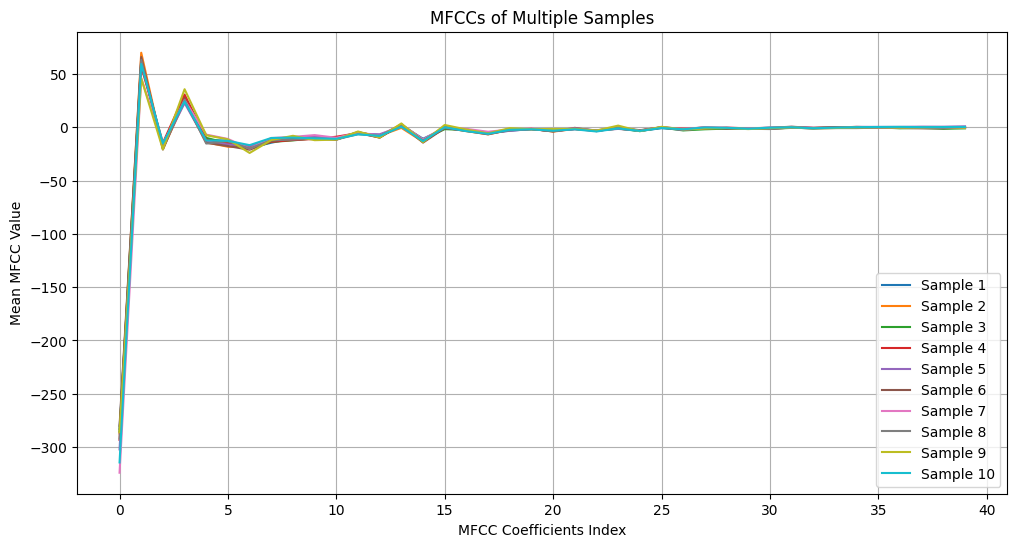

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


num_files_to_plot = min(10, len(train_files))

plt.figure(figsize=(12, 6))

for i in range(num_files_to_plot):
    file_path = train_files[i]
    y, sr = librosa.load(file_path, sr=16000)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)


    mfcc_mean = np.mean(mfccs, axis=1)


    plt.plot(mfcc_mean, label=f"Sample {i+1}")

plt.xlabel("MFCC Coefficients Index")
plt.ylabel("Mean MFCC Value")
plt.title("MFCCs of Multiple Samples")
plt.legend()
plt.grid()
plt.show()




# Visualizations

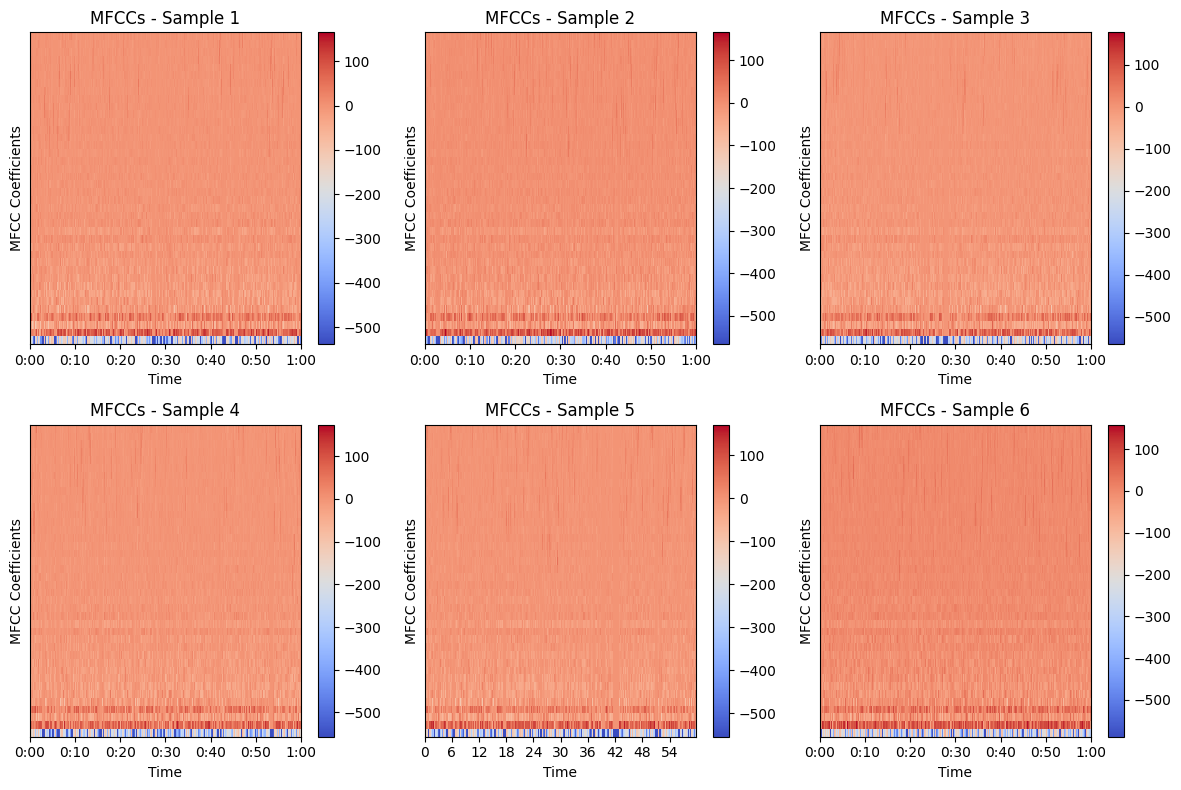

In [19]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

num_files_to_plot = min(6, len(train_files))  # Limiting to 6 for visualization

plt.figure(figsize=(12, 8))

for i in range(num_files_to_plot):
    file_path = train_files[i]
    y, sr = librosa.load(file_path, sr=16000)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

    plt.subplot(2, 3, i + 1)  # Arrange in a 2x3 grid
    librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='coolwarm')
    plt.colorbar()
    plt.title(f"MFCCs - Sample {i+1}")
    plt.xlabel("Time")
    plt.ylabel("MFCC Coefficients")

plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(train_labels)
y_test = encoder.transform(test_labels)

print("Unique Speakers:", encoder.classes_)

Unique Speakers: ['Speaker0026' 'Speaker0027' 'Speaker0028' 'Speaker0029' 'Speaker0030'
 'Speaker0031' 'Speaker0032' 'Speaker0033' 'Speaker0034' 'Speaker0035'
 'Speaker0036' 'Speaker0037' 'Speaker0038' 'Speaker0039' 'Speaker0040'
 'Speaker0041' 'Speaker0042' 'Speaker0043' 'Speaker0044' 'Speaker0045'
 'Speaker0046' 'Speaker0047' 'Speaker0048' 'Speaker0049' 'Speaker0050'
 'Speaker_0000' 'Speaker_0001' 'Speaker_0002' 'Speaker_0003'
 'Speaker_0004' 'Speaker_0005' 'Speaker_0006' 'Speaker_0007'
 'Speaker_0008' 'Speaker_0009' 'Speaker_0010' 'Speaker_0011'
 'Speaker_0012' 'Speaker_0013' 'Speaker_0014' 'Speaker_0015'
 'Speaker_0016' 'Speaker_0017' 'Speaker_0018' 'Speaker_0019'
 'Speaker_0020' 'Speaker_0021' 'Speaker_0023' 'Speaker_0024'
 'Speaker_0025']


# Deep Learning Model

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def create_model(input_size, num_classes):
    model = Sequential([
        Dense(3024, activation='relu', input_shape=(input_size,)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(2024, activation='relu', input_shape=(input_size,)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1024, activation='relu', input_shape=(input_size,)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),


        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

num_classes = len(encoder.classes_)
model = create_model(input_size=40, num_classes=num_classes)

# Train model
model.fit(X_train, y_train, epochs=80, batch_size=16, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.0434 - loss: 4.3865 - val_accuracy: 0.0365 - val_loss: 6.2666
Epoch 2/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1608 - loss: 3.2454 - val_accuracy: 0.4750 - val_loss: 2.1544
Epoch 3/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2429 - loss: 2.6462 - val_accuracy: 0.5404 - val_loss: 1.6977
Epoch 4/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3433 - loss: 2.2627 - val_accuracy: 0.5115 - val_loss: 1.5998
Epoch 5/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4033 - loss: 1.9719 - val_accuracy: 0.6135 - val_loss: 1.2221
Epoch 6/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4706 - loss: 1.7450 - val_accuracy: 0.7769 - val_loss: 0.9410
Epoch 7/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5129 - loss: 1.6303 - val_accuracy: 0.6942 - val_loss: 1.1085
Epoch 8/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5640 - loss: 1.4486 - val_accuracy: 

# Evaluation Metrics(Accuracy)

In [16]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = np.argmax(model.predict(X_test), axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Accuracy: 0.9673076923076923
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        12
           3       1.00      0.86      0.92         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        10
           6       0.89      1.00      0.94         8
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        11
          12       0.78      1.00      0.88         7
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# F1 Score

In [17]:
from sklearn.metrics import f1_score

# Predict the classes
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
F1 Score: 0.965660253614299


# Testing the Model on a sample test

In [18]:
def verify_speaker(audio_path, model, encoder):
    features = extract_mfcc(audio_path).reshape(1, -1)
    prediction = np.argmax(model.predict(features), axis=1)
    speaker = encoder.inverse_transform(prediction)
    return speaker[0]

new_audio = "/content/data/50_speakers_audio_data/Speaker0026/Speaker26_000.wav"  # Change to a real file
predicted_speaker = verify_speaker(new_audio, model, encoder)
print(f"Predicted Speaker: {predicted_speaker}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
Predicted Speaker: Speaker0026
